In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.FashionMNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor(),
    download = True 
)

In [4]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [5]:
print(test_data)

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [6]:
print(train_data.data.size())

torch.Size([60000, 28, 28])


In [7]:
print(test_data.data.size())

torch.Size([10000, 28, 28])


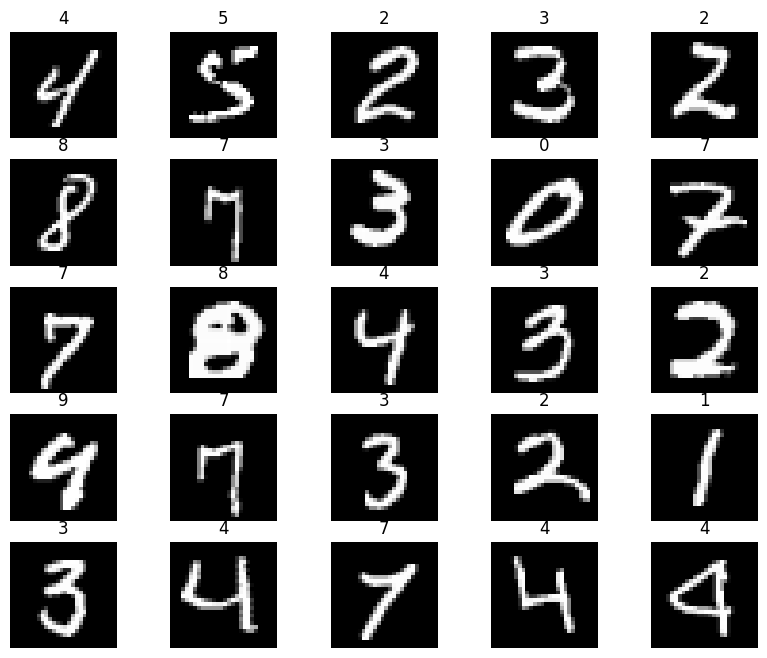

In [8]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [9]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f5663b84e50>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f563ec5b9d0>}

In [10]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1,64,3),
            nn.ReLU(),
            nn.MaxPool2d((2,2),stride=2),
            nn.Conv2d(64,128,3),
            nn.ReLU(),
            nn.MaxPool2d((2,2),stride=2),
            nn.Conv2d(128,64,3),
            nn.ReLU(),
            nn.MaxPool2d((2,2),stride=2)
        )
        self.classification_head=nn.Sequential(nn.Linear(64,20,bias=True),
                                               nn.ReLU(),
                                               nn.Linear(20,10,bias=True))
    def forward(self,x):
        features = self.net(x)
        return self.classification_head(features.view(100,-1))
            


In [11]:
cnn = CNN().to(device)

In [12]:
print(cnn)

CNN(
  (net): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification_head): Sequential(
    (0): Linear(in_features=64, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=10, bias=True)
  )
)


In [13]:
loss_func = nn.CrossEntropyLoss().to(device)

In [14]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [15]:
sum(p.numel() for p in cnn.parameters())

149798

In [16]:
losses = []
for batch,labels in loaders['train']:
    batch = batch.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    loss = loss_func(cnn(batch),labels)
    losses.append(loss.item())
    print(loss.item())
    loss.backward()
    optimizer.step()
    

/opt/anaconda3/envs/pytorch_env/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1702400440653/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


2.3173248767852783
2.4620280265808105
2.3098490238189697
2.289586067199707
2.3151721954345703
2.319214105606079
2.293789863586426
2.263715982437134
2.23708176612854
2.2485134601593018
2.210456609725952
2.191953182220459
2.1010539531707764
2.0995311737060547
2.066373109817505
2.0678536891937256
1.955573320388794
1.851768136024475
1.8979476690292358
1.8526383638381958
1.8374912738800049
1.7252370119094849
1.8719732761383057
1.6175636053085327
1.597255825996399
1.5191619396209717
1.568543553352356
1.4904701709747314
1.2817561626434326
1.5556318759918213
1.464194655418396
1.4450050592422485
1.51887845993042
1.4148656129837036
1.3492414951324463
1.2580815553665161
1.4526652097702026
0.9810919761657715
1.191118597984314
1.366633653640747
1.0189008712768555
1.1656217575073242
1.1181507110595703
1.001054048538208
1.0570944547653198
0.9937836527824402
0.9882789850234985
0.9992106556892395
0.9497666358947754
0.9346116781234741
0.6832014322280884
0.889544665813446
0.6635971069335938
0.60948610305

In [17]:
print("Models state dict :")
for param_tensor in cnn.state_dict().keys():
    print(param_tensor,'\t',cnn.state_dict()[param_tensor])

Models state dict :
net.0.weight 	 tensor([[[[-4.4470e-01, -8.5390e-02,  1.3541e-01],
          [-5.3162e-01,  2.6568e-01,  4.3089e-01],
          [-1.9212e-01,  3.6123e-01, -1.6386e-01]]],


        [[[-4.2881e-01, -6.1628e-01, -1.8024e-01],
          [-1.5234e-01, -5.5406e-01, -2.6543e-01],
          [ 5.2113e-01,  3.8840e-01, -6.8909e-02]]],


        [[[ 7.0030e-03, -2.8994e-01, -3.2744e-01],
          [-2.5668e-01,  2.0319e-01, -1.0123e-01],
          [-2.2981e-01, -1.4852e-01, -3.4626e-01]]],


        [[[ 3.3136e-03,  7.0659e-02, -3.9676e-01],
          [-3.1126e-01, -1.8712e-01,  2.9849e-01],
          [-1.7378e-01,  9.4698e-02,  8.1718e-02]]],


        [[[ 4.2114e-02,  1.3379e-01, -2.4744e-01],
          [-3.8449e-01, -2.1168e-01, -3.2669e-01],
          [-2.7732e-01, -3.3020e-01, -3.0138e-01]]],


        [[[-9.7215e-02,  2.2791e-01,  1.9015e-01],
          [-4.2791e-01,  4.6510e-01,  1.1928e-01],
          [-8.9816e-01, -9.2450e-01, -7.6515e-01]]],


        [[[ 6.3559e-02,

In [18]:
print("Optimizer state dict :")
for param_tensor in optimizer.state_dict().keys():
    print(param_tensor,'\t',optimizer.state_dict()[param_tensor])

Optimizer state dict :
state 	 {0: {'step': tensor(600.), 'exp_avg': tensor([[[[ 1.9640e-04,  7.7279e-04,  7.7600e-04],
          [ 2.0273e-04,  3.1895e-04,  2.8806e-04],
          [ 8.4266e-04,  5.1638e-04,  7.3825e-04]]],


        [[[ 1.1315e-04, -1.0254e-04, -9.8408e-05],
          [ 8.2581e-04,  2.2085e-04, -2.5513e-04],
          [-3.0561e-04, -3.6716e-04, -1.0187e-03]]],


        [[[ 0.0000e+00,  1.7288e-35,  0.0000e+00],
          [ 5.2961e-35, -1.7479e-28,  3.6604e-35],
          [ 0.0000e+00,  1.3475e-33,  1.9155e-34]]],


        [[[-7.9921e-05, -5.9444e-05, -1.9690e-04],
          [-1.7447e-05, -1.4213e-04, -7.5037e-04],
          [-2.1173e-04, -3.7782e-04, -7.1485e-04]]],


        [[[ 6.0185e-34,  6.6509e-34,  1.5924e-34],
          [ 3.3089e-35,  3.2607e-35,  1.3891e-37],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00]]],


        [[[-1.5632e-03, -1.9852e-04, -3.7690e-04],
          [-9.4347e-05,  8.9085e-04, -1.2911e-03],
          [ 3.1950e-04,  7.0598e-04, -5.6960

In [19]:
torch.save(cnn,'model/model.pt')

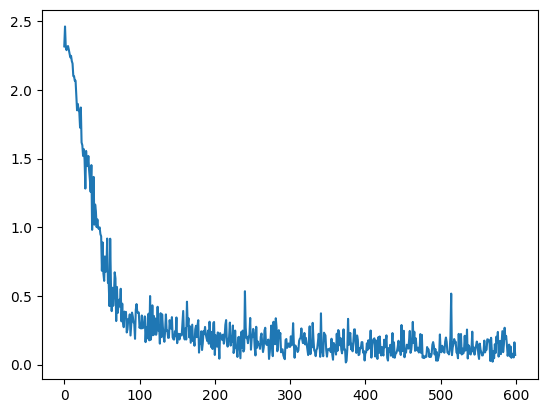

In [20]:
plt.plot(losses)

In [21]:
model = CNN()

In [22]:
model = torch.load('./model/model.pt')

In [23]:
model.to(device)

CNN(
  (net): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification_head): Sequential(
    (0): Linear(in_features=64, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=10, bias=True)
  )
)

In [24]:
print("Models state dict :")
for param_tensor in model.state_dict().keys():
    print(param_tensor,'\t',model.state_dict()[param_tensor])

Models state dict :
net.0.weight 	 tensor([[[[-4.4470e-01, -8.5390e-02,  1.3541e-01],
          [-5.3162e-01,  2.6568e-01,  4.3089e-01],
          [-1.9212e-01,  3.6123e-01, -1.6386e-01]]],


        [[[-4.2881e-01, -6.1628e-01, -1.8024e-01],
          [-1.5234e-01, -5.5406e-01, -2.6543e-01],
          [ 5.2113e-01,  3.8840e-01, -6.8909e-02]]],


        [[[ 7.0030e-03, -2.8994e-01, -3.2744e-01],
          [-2.5668e-01,  2.0319e-01, -1.0123e-01],
          [-2.2981e-01, -1.4852e-01, -3.4626e-01]]],


        [[[ 3.3136e-03,  7.0659e-02, -3.9676e-01],
          [-3.1126e-01, -1.8712e-01,  2.9849e-01],
          [-1.7378e-01,  9.4698e-02,  8.1718e-02]]],


        [[[ 4.2114e-02,  1.3379e-01, -2.4744e-01],
          [-3.8449e-01, -2.1168e-01, -3.2669e-01],
          [-2.7732e-01, -3.3020e-01, -3.0138e-01]]],


        [[[-9.7215e-02,  2.2791e-01,  1.9015e-01],
          [-4.2791e-01,  4.6510e-01,  1.1928e-01],
          [-8.9816e-01, -9.2450e-01, -7.6515e-01]]],


        [[[ 6.3559e-02,

In [25]:
model.eval()

CNN(
  (net): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification_head): Sequential(
    (0): Linear(in_features=64, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=10, bias=True)
  )
)

In [26]:
if torch.cuda.is_available():
    print('CUDA available')

CUDA available


In [27]:
total = 0
correct = 0
for batch,labels in loaders['test']:
    batch = batch.to(device)
    labels = labels.to(device)
    # model.to(device)
    preds = model(batch)
    for i in range(len(preds)):
        total+=1
        pred = preds[i].argmax().item()
        # print(pred.item(),end=',  ')
        actual = labels[i].item()
        if(pred == actual):
            correct +=1

print("accuracy : ",correct/total)
        

accuracy :  0.0872


In [28]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.FashionMNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.FashionMNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor(),
    download = True
)

In [29]:
print(train_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [30]:
print(test_data)

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [31]:
print(train_data.data.size())

torch.Size([60000, 28, 28])


In [32]:
print(test_data.data.size())

torch.Size([10000, 28, 28])


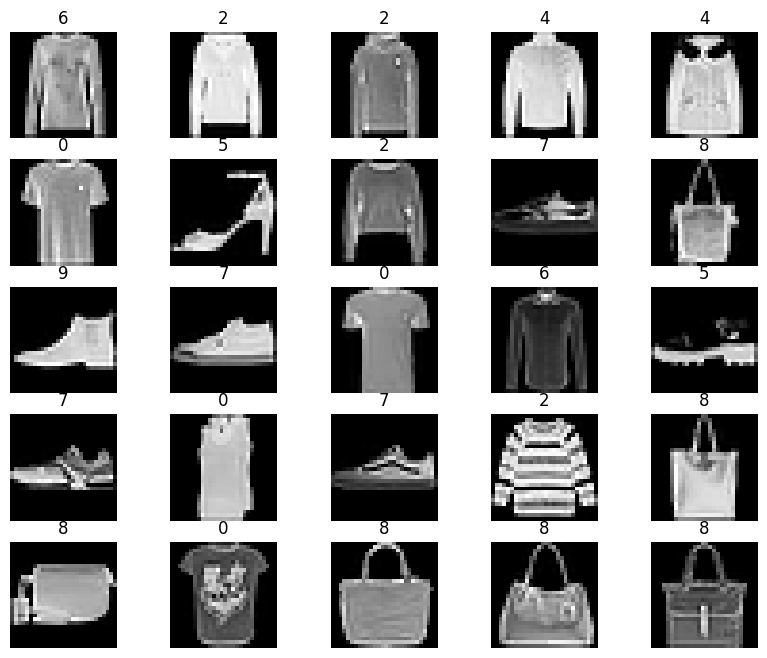

In [33]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [34]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f56365d1410>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f5636a04c10>}

In [35]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1,64,3),
            nn.ReLU(),
            nn.MaxPool2d((2,2),stride=2),
            nn.Conv2d(64,128,3),
            nn.ReLU(),
            nn.MaxPool2d((2,2),stride=2),
            nn.Conv2d(128,64,3),
            nn.ReLU(),
            nn.MaxPool2d((2,2),stride=2)
        )
        self.classification_head=nn.Sequential(nn.Linear(64,20,bias=True),
                                               nn.ReLU(),
                                               nn.Linear(20,10,bias=True))
    def forward(self,x):
        features = self.net(x)
        return self.classification_head(features.view(100,-1))
            
        

In [36]:
cnn = CNN().to(device)

In [37]:
print(cnn)

CNN(
  (net): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification_head): Sequential(
    (0): Linear(in_features=64, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=10, bias=True)
  )
)


In [38]:
loss_func = nn.CrossEntropyLoss().to(device)

In [39]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [40]:
sum(p.numel() for p in cnn.parameters())

149798

In [41]:
losses = []
epoch = 0
for batch,labels in loaders['train']:
    epoch+=1
    batch = batch.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    loss = loss_func(cnn(batch),labels)
    losses.append(loss.item())
    print(loss.item())
    loss.backward()
    optimizer.step()
    if epoch ==2:
        break
    

2.3123319149017334
2.2759170532226562


In [42]:
print("Models state dict :")
for param_tensor in cnn.state_dict().keys():
    print(param_tensor,'\t',cnn.state_dict()[param_tensor])

Models state dict :
net.0.weight 	 tensor([[[[-0.2758, -0.0490, -0.1792],
          [-0.0746,  0.1113, -0.0612],
          [ 0.1989,  0.0765,  0.2950]]],


        [[[ 0.1696, -0.3486,  0.0186],
          [-0.0823, -0.3025,  0.0777],
          [-0.2928, -0.0084,  0.0181]]],


        [[[ 0.0170,  0.2324, -0.1831],
          [ 0.1851, -0.1540, -0.0443],
          [-0.2144,  0.1333, -0.2355]]],


        [[[-0.2777, -0.0944,  0.2449],
          [-0.1084,  0.0831,  0.1804],
          [-0.2488, -0.2931, -0.2640]]],


        [[[ 0.1506, -0.0216,  0.1450],
          [ 0.0072, -0.1997, -0.1752],
          [-0.2399,  0.0060, -0.1979]]],


        [[[-0.1779,  0.1077, -0.2314],
          [ 0.0100, -0.0609, -0.0408],
          [-0.2630, -0.0641, -0.2220]]],


        [[[ 0.2404, -0.0950,  0.3015],
          [ 0.1063,  0.0872,  0.2438],
          [ 0.0998,  0.1037,  0.0562]]],


        [[[ 0.1884,  0.1768, -0.3055],
          [-0.0287, -0.2794, -0.0119],
          [-0.2011, -0.1728, -0.0069]]],

In [43]:
print("Optimizer state dict :")
for param_tensor in optimizer.state_dict().keys():
    print(param_tensor,'\t',optimizer.state_dict()[param_tensor])

Optimizer state dict :
state 	 {0: {'step': tensor(2.), 'exp_avg': tensor([[[[ 5.3130e-05,  1.0011e-05,  1.2289e-05],
          [ 4.9677e-05, -4.8965e-06, -2.1691e-05],
          [ 3.3050e-05, -2.4985e-05, -2.6659e-05]]],


        [[[ 2.0051e-05,  8.8086e-06, -4.3314e-05],
          [ 7.5201e-06,  7.9010e-06, -4.5091e-05],
          [ 2.9427e-06, -1.0839e-05, -4.7228e-05]]],


        [[[-4.1294e-05, -3.2506e-05, -1.0344e-05],
          [-3.8732e-05, -1.5083e-05,  3.9810e-07],
          [-2.8967e-05, -1.1128e-05,  3.4985e-06]]],


        [[[ 8.7753e-06,  1.3432e-06, -4.3547e-05],
          [ 8.0848e-06,  2.0298e-06, -4.7727e-05],
          [-4.3830e-06, -1.0296e-05, -5.9394e-05]]],


        [[[ 2.9675e-06,  3.6856e-06,  3.8940e-06],
          [ 7.3957e-08,  6.8055e-07,  8.6144e-07],
          [ 5.3045e-07,  7.7254e-07,  3.2229e-07]]],


        [[[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+

In [44]:
check_point = {'last_loss' : losses[-1],"last_epoch":epoch,"model_state":cnn.state_dict(),"optimizer_state":optimizer.state_dict()}
torch.save(check_point,"./checkpoint/checkpoint.pt")

In [45]:
checkpoint = torch.load("./checkpoint/checkpoint.pt")
model = CNN().to(device)
model.load_state_dict(checkpoint['model_state'])

<All keys matched successfully>

In [46]:
model.eval()

CNN(
  (net): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification_head): Sequential(
    (0): Linear(in_features=64, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=10, bias=True)
  )
)

In [47]:
loss_func = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.01)  

In [48]:
optimizer.load_state_dict(checkpoint['optimizer_state'])

In [49]:
loss = checkpoint['last_loss']
last_epoch = checkpoint['last_epoch']

In [50]:
last_epoch

2

In [51]:
epochs = 0
losses = []
for batch,labels in loaders['train']:
    batch = batch.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    loss = loss_func(model(batch),labels)
    print(loss)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

tensor(2.3525, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.4573, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1884, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1360, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.0771, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.9005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.7275, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8576, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.7702, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4721, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4335, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4949, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.3462, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5769, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2508, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.3732, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.3118, device='cuda:0', grad_fn=

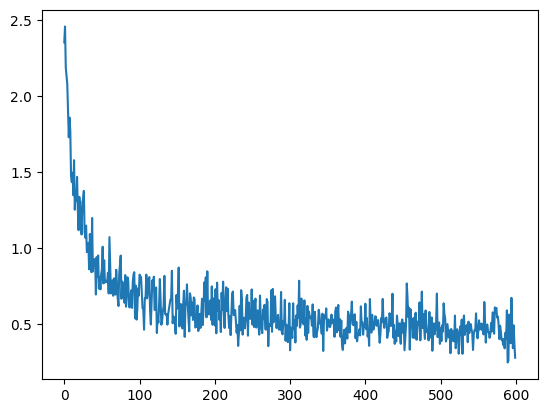

In [52]:
plt.plot(losses)